<a href="https://colab.research.google.com/github/qazwsxedc900/ML-2021-Spring/blob/main/%E3%80%8CML2021Spring_HW1_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1: COVID-19 Cases Prediction (Regression)**

Author: Heng-Jui Chang

Slides: https://github.com/ga642381/ML2021-Spring/blob/main/HW01/HW01.pdf  
Videos (Mandarin): https://cool.ntu.edu.tw/courses/4793/modules/items/172854  
https://cool.ntu.edu.tw/courses/4793/modules/items/172853  
Video (English): https://cool.ntu.edu.tw/courses/4793/modules/items/176529


Objectives:
* Solve a regression problem with deep neural networks (DNN).
* Understand basic DNN training tips.
* Get familiar with PyTorch.

If any questions, please contact the TAs via TA hours, NTU COOL, or email.


# **Download Data**


If the Google drive links are dead, you can download data from [kaggle](https://www.kaggle.com/c/ml2021spring-hw1/data), and upload data manually to the workspace.

In [ ]:
%cd /root

/root


In [ ]:
tr_path = 'covid.train.csv'  # path to training data
tt_path = 'covid.test.csv'   # path to testing data

!gdown --id '19CCyCgJrUxtvgZF53vnctJiOJ23T5mqF' --output covid.train.csv
!gdown --id '1CE240jLm2npU-tdz81-oVKEF3T2yfT1O' --output covid.test.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19CCyCgJrUxtvgZF53vnctJiOJ23T5mqF
To: /root/covid.train.csv
100% 2.00M/2.00M [00:00<00:00, 118MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CE240jLm2npU-tdz81-oVKEF3T2yfT1O
To: /root/covid.test.csv
100% 651k/651k [00:00<00:00, 111MB/s]


In [ ]:
# prompt: read /root/covid.train.csv into pandas

import pandas as pd

df_train = pd.read_csv(tr_path)

In [ ]:
df_train

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472,19.896607
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.091433,43.290957,15.214655,1.641667,14.778802,12.417256,16.134238,52.560315,43.321985,20.178428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.090116,30.839219,7.849525,1.760094,14.617563,11.163213,18.742673,68.024690,38.920206,13.008853
2696,2696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.779264,30.617100,7.754800,1.780730,14.513419,11.281241,18.539741,67.855755,39.224244,12.725638
2697,2697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.961085,30.595194,7.744075,1.921828,14.160990,11.163526,18.702564,67.731162,38.740651,12.613441
2698,2698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.609582,30.420998,7.687974,1.992580,14.409427,11.330301,19.134697,67.795100,38.595125,12.477227


In [ ]:
x = df_train[df_train.columns[1:94]]
y = df_train[df_train.columns[94]]

In [ ]:
# prompt: check the data type of features in x; distinguish they are numerical or class or order feature

import pandas as pd
for col in x.columns:
    dtype = x[col].dtype
    if pd.api.types.is_numeric_dtype(dtype):
        print(f"Feature '{col}' is numerical (Type: {dtype})")
    elif pd.api.types.is_object_dtype(dtype):
        # For object types, we might need to look at values to distinguish between class and order
        # A simple check: if the number of unique values is small, it might be a categorical/class feature
        # This is a heuristic and might not be perfect
        unique_values_count = x[col].nunique()
        if unique_values_count <= 50: # Threshold can be adjusted
            print(f"Feature '{col}' is potentially class/categorical (Type: {dtype}, Unique values: {unique_values_count})")
        else:
            print(f"Feature '{col}' is potentially an identifier or high cardinality categorical (Type: {dtype}, Unique values: {unique_values_count})")
    else:
        print(f"Feature '{col}' has unclassified type (Type: {dtype})")

Feature 'AL' is numerical (Type: float64)
Feature 'AK' is numerical (Type: float64)
Feature 'AZ' is numerical (Type: float64)
Feature 'AR' is numerical (Type: float64)
Feature 'CA' is numerical (Type: float64)
Feature 'CO' is numerical (Type: float64)
Feature 'CT' is numerical (Type: float64)
Feature 'FL' is numerical (Type: float64)
Feature 'GA' is numerical (Type: float64)
Feature 'ID' is numerical (Type: float64)
Feature 'IL' is numerical (Type: float64)
Feature 'IN' is numerical (Type: float64)
Feature 'IA' is numerical (Type: float64)
Feature 'KS' is numerical (Type: float64)
Feature 'KY' is numerical (Type: float64)
Feature 'LA' is numerical (Type: float64)
Feature 'MD' is numerical (Type: float64)
Feature 'MA' is numerical (Type: float64)
Feature 'MI' is numerical (Type: float64)
Feature 'MN' is numerical (Type: float64)
Feature 'MS' is numerical (Type: float64)
Feature 'MO' is numerical (Type: float64)
Feature 'NE' is numerical (Type: float64)
Feature 'NV' is numerical (Type: f

In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing

# Normalisation
x = (x - x.min()) / (x.max() - x.min())

# Create an instance of SelectKBest without specifying 'k'
bestfeatures = SelectKBest(score_func=f_regression)

# Compute the scores for all features
fit = bestfeatures.fit(x,y)

# Convert the scores into a DataFrame
dfscores = pd.DataFrame(fit.scores_)

# Create a DataFrame of the column names
dfcolumns = pd.DataFrame(x.columns)

# Concatenate the two DataFrames for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

# Name the DataFrame columns
featureScores.columns = ['Specs','Score']

# Print the 20 rows with the highest scores
print(featureScores.nlargest(20,'Score'))

# Print the index of the most important features
top_rows = featureScores.nlargest(20, 'Score').index.tolist()[:17]
print(top_rows)


                 Specs          Score
75   tested_positive.1  148069.658278
57     tested_positive   69603.872591
42        hh_cmnty_cli    9235.492094
60      hh_cmnty_cli.1    9209.019558
78      hh_cmnty_cli.2    9097.375172
43      nohh_cmnty_cli    8395.421300
61    nohh_cmnty_cli.1    8343.255927
79    nohh_cmnty_cli.2    8208.176435
40                 cli    6388.906849
58               cli.1    6374.548000
76               cli.2    6250.008702
41                 ili    5998.922880
59               ili.1    5937.588576
77               ili.2    5796.947672
92  worried_finances.2     833.613191
74  worried_finances.1     811.916460
56    worried_finances     788.076931
87    public_transit.2     686.736539
69    public_transit.1     681.562902
51      public_transit     678.834789
[75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92, 74, 56]


# **Import Some Packages**

In [ ]:
# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For data preprocess
import numpy as np
import csv
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

myseed = 42069  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

# **Some Utilities**

You do not need to modify this part.

In [ ]:
def get_device():
    ''' Get device (if GPU is available, use GPU) '''
    return 'cuda' if torch.cuda.is_available() else 'cpu'

def plot_learning_curve(loss_record, title=''):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]
    figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
    plt.ylim(0.0, 5.)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()


def plot_pred(dv_set, model, device, lim=35., preds=None, targets=None):
    ''' Plot prediction of your DNN '''
    if preds is None or targets is None:
        model.eval()
        preds, targets = [], []
        for x, y in dv_set:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():
                pred = model(x)
                preds.append(pred.detach().cpu())
                targets.append(y.detach().cpu())
        preds = torch.cat(preds, dim=0).numpy()
        targets = torch.cat(targets, dim=0).numpy()

    figure(figsize=(5, 5))
    plt.scatter(targets, preds, c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='b')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()

# **Preprocess**

We have three kinds of datasets:
* `train`: for training
* `dev`: for validation
* `test`: for testing (w/o target value)

## **Dataset**

The `COVID19Dataset` below does:
* read `.csv` files
* extract features
* split `covid.train.csv` into train/dev sets
* normalize features

Finishing `TODO` below might make you pass medium baseline.

# TODO
當target_only=True時
選擇特定的特徵

In [ ]:
'''
class COVID19Dataset(Dataset):
    def __init__(self,
                 path,
                 mode='train',
                 target_only=False):
        self.mode = mode

        # Read data into numpy arrays
        with open(path, 'r') as fp:
            data = list(csv.reader(fp))
            data = np.array(data[1:])[:, 1:].astype(float)

        if not target_only:
            feats = list(range(93))
        else:
            # TODO: Using 40 states & 2 tested_positive features (indices = 57 & 75)
            feats = [75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92, 74, 56]
            #pass

        if mode == 'test':
            # Testing data
            # data: 893 x 93 (40 states + day 1 (18) + day 2 (18) + day 3 (17))
            data = data[:, feats]
            self.data = torch.FloatTensor(data)
        else:
            # Training data (train/dev sets)
            # data: 2700 x 94 (40 states + day 1 (18) + day 2 (18) + day 3 (18))
            target = data[:, -1]
            data = data[:, feats]

            # Splitting training data into train & dev sets
            if mode == 'train':
                indices = [i for i in range(len(data)) if i % 10 != 0]
            elif mode == 'dev':
                indices = [i for i in range(len(data)) if i % 10 == 0]

            # Convert data into PyTorch tensors
            self.data = torch.FloatTensor(data[indices])
            self.target = torch.FloatTensor(target[indices])

        # Normalize features (you may remove this part to see what will happen)
        self.data[:, 40:] = \
            (self.data[:, 40:] - self.data[:, 40:].mean(dim=0, keepdim=True)) \
            / self.data[:, 40:].std(dim=0, keepdim=True)

        self.dim = self.data.shape[1]

        print('Finished reading the {} set of COVID19 Dataset ({} samples found, each dim = {})'
              .format(mode, len(self.data), self.dim))

    def __getitem__(self, index):
        # Returns one sample at a time
        if self.mode in ['train', 'dev']:
            # For training
            return self.data[index], self.target[index]
        else:
            # For testing (no target)
            return self.data[index]

    def __len__(self):
        # Returns the size of the dataset
        return len(self.data)
'''

"\nclass COVID19Dataset(Dataset):\n    def __init__(self,\n                 path,\n                 mode='train',\n                 target_only=False):\n        self.mode = mode\n\n        # Read data into numpy arrays\n        with open(path, 'r') as fp:\n            data = list(csv.reader(fp))\n            data = np.array(data[1:])[:, 1:].astype(float)\n\n        if not target_only:\n            feats = list(range(93))\n        else:\n            # TODO: Using 40 states & 2 tested_positive features (indices = 57 & 75)\n            feats = [75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92, 74, 56]\n            #pass\n\n        if mode == 'test':\n            # Testing data\n            # data: 893 x 93 (40 states + day 1 (18) + day 2 (18) + day 3 (17))\n            data = data[:, feats]\n            self.data = torch.FloatTensor(data)\n        else:\n            # Training data (train/dev sets)\n            # data: 2700 x 94 (40 states + day 1 (18) + day 2 (18) + day 3 (18))

發現錯誤是valid和test是用他們自己的統計數據來正規化，但是應該用train的

In [ ]:
class COVID19Dataset(Dataset):
    ''' Dataset for loading and preprocessing the COVID19 dataset '''
    def __init__(self,
                 path,
                 mode='train',
                 target_only=False,
                 train_mean=None,
                 train_std=None):
        self.mode = mode

        # Read data into numpy arrays
        with open(path, 'r') as fp:
            data = list(csv.reader(fp))
            data = np.array(data[1:])[:, 1:].astype(float)

        if not target_only:
            feats = list(range(93))
        else:
            # TODO: Using 40 states & 2 tested_positive features (indices = 57 & 75)
            feats = [75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92, 74, 56]
            #pass

        if mode == 'test':
            # Testing data
            # data: 893 x 93 (40 states + day 1 (18) + day 2 (18) + day 3 (17))
            data = data[:, feats]
            self.data = torch.FloatTensor(data)
        else:
            # Training data (train/dev sets)
            # data: 2700 x 94 (40 states + day 1 (18) + day 2 (18) + day 3 (18))
            target = data[:, -1]
            data = data[:, feats]

            # Splitting training data into train & dev sets
            if mode == 'train':
                indices = [i for i in range(len(data)) if i % 10 != 0]
            elif mode == 'dev':
                indices = [i for i in range(len(data)) if i % 10 == 0]

            # Convert data into PyTorch tensors
            self.data = torch.FloatTensor(data[indices])
            self.target = torch.FloatTensor(target[indices])

        # Normalize features (you may remove this part to see what will happen)
        if mode == 'train':
          full_train_data = torch.FloatTensor(np.array(list(csv.reader(open(path, 'r')))[1:])[:, 1:].astype(float)[:, feats])
          self.train_mean = full_train_data[:, 40:].mean(dim=0, keepdim=True)
          self.train_std = full_train_data[:, 40:].std(dim=0, keepdim=True)
          self.data[:, 40:] = (self.data[:, 40:] - self.train_mean) / self.train_std
        elif train_mean is not None and train_std is not None:
            # Use the passed mean and std for dev and test sets
            self.train_mean = train_mean
            self.train_std = train_std
            self.data[:, 40:] = (self.data[:, 40:] - self.train_mean) / self.train_std
        else:
             # If not train mode and mean/std are not passed, issue a warning or handle appropriately
             # For simplicity, let's assume mean/std will always be passed for dev/test if calculated on train
             print("Warning: Mean and standard deviation not provided for normalization.")




        self.dim = self.data.shape[1]

        print('Finished reading the {} set of COVID19 Dataset ({} samples found, each dim = {})'
              .format(mode, len(self.data), self.dim))

    def __getitem__(self, index):
        # Returns one sample at a time
        if self.mode in ['train', 'dev']:
            # For training
            return self.data[index], self.target[index]
        else:
            # For testing (no target)
            return self.data[index]

    def __len__(self):
        # Returns the size of the dataset
        return len(self.data)

## **DataLoader**

A `DataLoader` loads data from a given `Dataset` into batches.


In [ ]:
'''
def prep_dataloader(path, mode, batch_size, n_jobs=0, target_only=False):
    dataset = COVID19Dataset(path, mode=mode, target_only=target_only)  # Construct dataset
    dataloader = DataLoader(
        dataset, batch_size,
        shuffle=(mode == 'train'), drop_last=False,
        num_workers=n_jobs, pin_memory=True)                            # Construct dataloader
    return dataloader
'''

"\ndef prep_dataloader(path, mode, batch_size, n_jobs=0, target_only=False):\n    dataset = COVID19Dataset(path, mode=mode, target_only=target_only)  # Construct dataset\n    dataloader = DataLoader(\n        dataset, batch_size,\n        shuffle=(mode == 'train'), drop_last=False,\n        num_workers=n_jobs, pin_memory=True)                            # Construct dataloader\n    return dataloader\n"

In [ ]:
def prep_dataloader(path, mode, batch_size, n_jobs=0, target_only=False, train_dataset=None):
    ''' Generates a dataset, then is put into a dataloader. '''
    if mode == 'train':
        dataset = COVID19Dataset(path, mode=mode, target_only=target_only)
        dataloader = DataLoader(
            dataset, batch_size,
            shuffle=(mode == 'train'), drop_last=False,
            num_workers=n_jobs, pin_memory=True)
        return dataloader, dataset # Return dataset to get mean and std
    else:
        if train_dataset is None:
            raise ValueError("For 'dev' and 'test' modes, the train_dataset must be provided to get normalization parameters.")
        dataset = COVID19Dataset(path, mode=mode, target_only=target_only,
                                train_mean=train_dataset.train_mean,
                                train_std=train_dataset.train_std)
        dataloader = DataLoader(
            dataset, batch_size,
            shuffle=(mode == 'train'), drop_last=False,
            num_workers=n_jobs, pin_memory=True)
        return dataloader

# **Deep Neural Network**

`NeuralNet` is an `nn.Module` designed for regression.
The DNN consists of 2 fully-connected layers with ReLU activation.
This module also included a function `cal_loss` for calculating loss.


In [ ]:
class NeuralNet(nn.Module):
    ''' A simple fully-connected deep neural network '''
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()

        # Define your neural network here
        # TODO: How to modify this model to achieve better performance?
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

        # Mean squared error loss
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        ''' Given input of size (batch_size x input_dim), compute output of the network '''
        return self.net(x).squeeze(1)

    def cal_loss(self, pred, target):
        ''' Calculate loss '''
        # TODO: you may implement L1/L2 regularization here
        return self.criterion(pred, target)

# **Train/Dev/Test**

## **Training**

In [ ]:
def train(tr_set, dv_set, model, config, device):
    ''' DNN training '''

    n_epochs = config['n_epochs']  # Maximum number of epochs

    # Setup optimizer
    optimizer = getattr(torch.optim, config['optimizer'])(
        model.parameters(), **config['optim_hparas'])

    min_mse = 1000.
    loss_record = {'train': [], 'dev': []}      # for recording training loss
    early_stop_cnt = 0
    epoch = 0
    while epoch < n_epochs:
        model.train()                           # set model to training mode
        for x, y in tr_set:                     # iterate through the dataloader
            optimizer.zero_grad()               # set gradient to zero
            x, y = x.to(device), y.to(device)   # move data to device (cpu/cuda)
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
            mse_loss.backward()                 # compute gradient (backpropagation)
            optimizer.step()                    # update model with optimizer
            loss_record['train'].append(mse_loss.detach().cpu().item())

        # After each epoch, test your model on the validation (development) set.
        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            # Save model if your model improved
            min_mse = dev_mse
            print('Saving model (epoch = {:4d}, loss = {:.4f})'
                .format(epoch + 1, min_mse))
            torch.save(model.state_dict(), config['save_path'])  # Save model to specified path
            early_stop_cnt = 0
        else:
            early_stop_cnt += 1

        epoch += 1
        loss_record['dev'].append(dev_mse)
        if early_stop_cnt > config['early_stop']:
            # Stop training if your model stops improving for "config['early_stop']" epochs.
            break

    print('Finished training after {} epochs'.format(epoch))
    return min_mse, loss_record

## **Validation**

In [ ]:
def dev(dv_set, model, device):
    model.eval()                                # set model to evalutation mode
    total_loss = 0
    for x, y in dv_set:                         # iterate through the dataloader
        x, y = x.to(device), y.to(device)       # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
        total_loss += mse_loss.detach().cpu().item() * len(x)  # accumulate loss
    total_loss = total_loss / len(dv_set.dataset)              # compute averaged loss

    return total_loss

## **Testing**

In [ ]:
def test(tt_set, model, device):
    model.eval()                                # set model to evalutation mode
    preds = []
    for x in tt_set:                            # iterate through the dataloader
        x = x.to(device)                        # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            preds.append(pred.detach().cpu())   # collect prediction
    preds = torch.cat(preds, dim=0).numpy()     # concatenate all predictions and convert to a numpy array
    return preds

# **Setup Hyper-parameters**

`config` contains hyper-parameters for training and the path to save your model.

In [ ]:
device = get_device()                 # get the current available device ('cpu' or 'cuda')
os.makedirs('models', exist_ok=True)  # The trained model will be saved to ./models/
target_only = True                   # TODO: Using 40 states & 2 tested_positive features

# TODO: How to tune these hyper-parameters to improve your model's performance?
config = {
    'n_epochs': 3000,                # maximum number of epochs
    'batch_size': 270,               # mini-batch size for dataloader
    'optimizer': 'SGD',              # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {                # hyper-parameters for the optimizer (depends on which optimizer you are using)
        'lr': 0.001,                 # learning rate of SGD
        'momentum': 0.9              # momentum for SGD
    },
    'early_stop': 200,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

In [ ]:
search_space = {
    'n_epochs': [1500, 2500, 3500, 4000],  # Discrete choices for max epochs
    'batch_size': [64, 128, 256, 512],     # Discrete choices for batch size
    'early_stop': [150, 250, 350],         # Discrete choices for early stopping
    'optimizer': ['SGD'],          # Discrete choices for optimizer

    # Define ranges for optimizer-specific hyperparameters
    'optim_hparas_sgd_lr': (1e-4, 1e-2),   # Learning rate for SGD (log uniform distribution)
    'optim_hparas_sgd_momentum': (0.8, 0.99), # Momentum for SGD (uniform distribution)

}

# To do
調超參數

# **Load data and model**

In [ ]:
tr_set, tr_dataset = prep_dataloader(tr_path, 'train', config['batch_size'], target_only=target_only)
dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], target_only=target_only, train_dataset=tr_dataset)
tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], target_only=target_only, train_dataset=tr_dataset)


<ipython-input-130-10550782f727>:48: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  self.train_std = full_train_data[:, 40:].std(dim=0, keepdim=True)


Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 17)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 17)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 17)


In [ ]:
'''
tr_set = prep_dataloader(tr_path, 'train', config['batch_size'], target_only=target_only)
dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], target_only=target_only)
tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], target_only=target_only)
'''

"\ntr_set = prep_dataloader(tr_path, 'train', config['batch_size'], target_only=target_only)\ndv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], target_only=target_only)\ntt_set = prep_dataloader(tt_path, 'test', config['batch_size'], target_only=target_only)\n"

# **Start Training!**

In [ ]:
import random
num_trials = 30 # Number of random combinations to try

best_loss = float('inf')
best_config = None
results = [] # To store results of each combination

print(f"Starting Random Search for {num_trials} trials...")


for i in range(num_trials):
    print(f"\n--- Trial {i+1}/{num_trials} ---")

    # Sample hyperparameters randomly
    config = {
        'n_epochs': random.choice(search_space['n_epochs']),
        'batch_size': random.choice(search_space['batch_size']),
        'early_stop': random.choice(search_space['early_stop']),
        'optimizer': random.choice(search_space['optimizer']),
        'save_path': 'models/model_temp.pth' # Temporary path for each run
    }

    # Sample optimizer-specific hyperparameters
    optim_hparas = {}
    if config['optimizer'] == 'SGD':
        # Sample learning rate from a log-uniform distribution
        optim_hparas['lr'] = 10**random.uniform(np.log10(search_space['optim_hparas_sgd_lr'][0]),
                                                np.log10(search_space['optim_hparas_sgd_lr'][1]))
        optim_hparas['momentum'] = random.uniform(search_space['optim_hparas_sgd_momentum'][0],
                                                  search_space['optim_hparas_sgd_momentum'][1])
    elif config['optimizer'] == 'Adam':
        # Sample learning rate from a log-uniform distribution
        optim_hparas['lr'] = 10**random.uniform(np.log10(search_space['optim_hparas_adam_lr'][0]),
                                                np.log10(search_space['optim_hparas_adam_lr'][1]))
        # Add other Adam specific hparas here if you were sampling them, e.g.:
        # optim_hparas['betas'] = (random.uniform(search_space['optim_hparas_adam_betas_0'][0], search_space['optim_hparas_adam_betas_0'][1]),
        #                          random.uniform(search_space['optim_hparas_adam_betas_1'][0], search_space['optim_hparas_adam_betas_1'][1]))

    config['optim_hparas'] = optim_hparas

    # Re-initialize the model for each new configuration
    model = NeuralNet(tr_set.dataset.dim).to(device)  # Construct model and move to device

    model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

    # Assuming model_loss is the final validation loss
    if model_loss < best_loss:
        best_loss = model_loss
        best_config = config
        # Save the best model with a distinct name
        best_model_save_path = f'models/best_model_random_search_{best_loss:.4f}.pth'
        torch.save(model.state_dict(), best_model_save_path)
        print(f"  New best loss found: {best_loss:.4f}. Model saved to: {best_model_save_path}")

    results.append({
        'config': config,
        'final_loss': model_loss
    })

print("\n--- Random Search Complete ---")
print(f"Best Loss: {best_loss:.4f}")
print(f"Best Config: {best_config}")

# Sort results to see the top performing configurations
results.sort(key=lambda x: x['final_loss'])
print("\nTop 5 configurations from Random Search:")
for i, res in enumerate(results[:5]):
    print(f"{i+1}. Loss: {res['final_loss']:.4f}, Config: {res['config']}")


Starting Random Search for 30 trials...

--- Trial 1/30 ---
Saving model (epoch =    1, loss = 204.4758)
Saving model (epoch =    2, loss = 83.0008)
Saving model (epoch =    3, loss = 35.4000)
Saving model (epoch =    4, loss = 10.9989)
Saving model (epoch =    5, loss = 6.0010)
Saving model (epoch =    6, loss = 4.9519)
Saving model (epoch =    7, loss = 3.9505)
Saving model (epoch =    8, loss = 3.4579)
Saving model (epoch =   10, loss = 2.3072)
Saving model (epoch =   11, loss = 1.8757)
Saving model (epoch =   12, loss = 1.4828)
Saving model (epoch =   14, loss = 1.4354)
Saving model (epoch =   15, loss = 1.4301)
Saving model (epoch =   18, loss = 1.3803)
Saving model (epoch =   19, loss = 1.3495)
Saving model (epoch =   20, loss = 1.3415)
Saving model (epoch =   29, loss = 1.2765)
Saving model (epoch =   32, loss = 1.2265)
Saving model (epoch =   36, loss = 1.2189)
Saving model (epoch =   38, loss = 1.1821)
Saving model (epoch =   45, loss = 1.1528)
Saving model (epoch =   48, loss

In [ ]:
results[0]['config']

{'n_epochs': 3500,
 'batch_size': 512,
 'early_stop': 250,
 'optimizer': 'SGD',
 'save_path': 'models/model_temp.pth',
 'optim_hparas': {'lr': np.float64(0.00012377570586428517),
  'momentum': 0.8872202267288102}}

In [ ]:
extracted_config = results[0]['config']


config['n_epochs'] = extracted_config['n_epochs']
config['batch_size'] = extracted_config['batch_size']
config['early_stop'] = extracted_config['early_stop']
config['optimizer'] = extracted_config['optimizer']

# Update the 'optim_hparas' dictionary
# It's generally a good idea to access the sub-dictionary and then its keys
config['optim_hparas']['lr'] = float(extracted_config['optim_hparas']['lr']) # Convert np.float64 to standard float
config['optim_hparas']['momentum'] = float(extracted_config['optim_hparas']['momentum']) # Convert np.float64 to standard float

In [ ]:
model = NeuralNet(tr_set.dataset.dim).to(device)  # Construct model and move to device

In [ ]:
model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)

Saving model (epoch =    1, loss = 42.1907)
Saving model (epoch =    2, loss = 21.2089)
Saving model (epoch =    3, loss = 14.7681)
Saving model (epoch =    4, loss = 8.3868)
Saving model (epoch =    5, loss = 4.9132)
Saving model (epoch =    6, loss = 3.5645)
Saving model (epoch =    7, loss = 2.4260)
Saving model (epoch =    8, loss = 1.7143)
Saving model (epoch =    9, loss = 1.4252)
Saving model (epoch =   10, loss = 1.3421)
Saving model (epoch =   11, loss = 1.3260)
Saving model (epoch =   17, loss = 1.2708)
Saving model (epoch =   20, loss = 1.2469)
Saving model (epoch =   21, loss = 1.2395)
Saving model (epoch =   23, loss = 1.2346)
Saving model (epoch =   25, loss = 1.2265)
Saving model (epoch =   30, loss = 1.1953)
Saving model (epoch =   32, loss = 1.1895)
Saving model (epoch =   33, loss = 1.1771)
Saving model (epoch =   35, loss = 1.1722)
Saving model (epoch =   36, loss = 1.1669)
Saving model (epoch =   37, loss = 1.1584)
Saving model (epoch =   40, loss = 1.1413)
Saving m

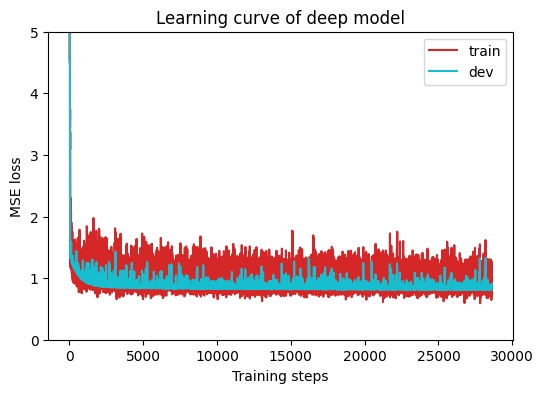

In [ ]:
plot_learning_curve(model_loss_record, title='deep model')

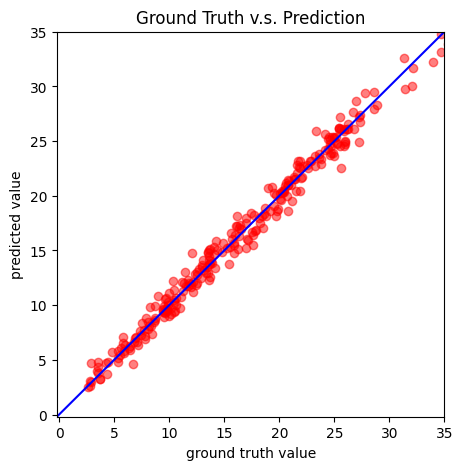

In [ ]:
del model
model = NeuralNet(tr_set.dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)
plot_pred(dv_set, model, device)  # Show prediction on the validation set

# **Testing**
The predictions of your model on testing set will be stored at `pred.csv`.

In [ ]:
def save_pred(preds, file):
    ''' Save predictions to specified file '''
    print('Saving results to {}'.format(file))
    with open(file, 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['id', 'tested_positive'])
        for i, p in enumerate(preds):
            writer.writerow([i, p])

preds = test(tt_set, model, device)  # predict COVID-19 cases with your model
save_pred(preds, 'pred.csv')         # save prediction file to pred.csv

Saving results to pred.csv


In [ ]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ML2021
#change directory to google drive

/content/drive/MyDrive/ML2021


In [ ]:
!mkdir HW1 #make a directory named ML2021
%cd ./HW1
#change directory to ML2021

mkdir: cannot create directory ‘HW1’: File exists
/content/drive/MyDrive/ML2021/HW1


In [ ]:
!ls /root

covid.test.csv	covid.train.csv  models  pred.csv


In [ ]:
!cp '/root/pred.csv' '/content/drive/MyDrive/ML2021/HW1'

# **Hints**

## **Simple Baseline**
* Run sample code

## **Medium Baseline**
* Feature selection: 40 states + 2 `tested_positive` (`TODO` in dataset)

## **Strong Baseline**
* Feature selection (what other features are useful?)
* DNN architecture (layers? dimension? activation function?)
* Training (mini-batch? optimizer? learning rate?)
* L2 regularization
* There are some mistakes in the sample code, can you find them?

# **Reference**
This code is completely written by Heng-Jui Chang @ NTUEE.  
Copying or reusing this code is required to specify the original author.

E.g.  
Source: Heng-Jui Chang @ NTUEE (https://github.com/ga642381/ML2021-Spring/blob/main/HW01/HW01.ipynb)
